
# CIFAR-10 Neural Network Model Report



## Neural Network Architecture

The model designed for the CIFAR-10 dataset is a deep convolutional neural network (CNN) that includes multiple convolutional layers, activation functions, batch normalization, dropout for regularization, and pooling layers to reduce spatial dimensions. The architecture is meticulously designed to efficiently learn the complex patterns in CIFAR-10 dataset images, which include 10 different classes like animals and vehicles. Key features include:

- Convolutional layers with ReLU activation to capture features from the images.
- Batch normalization to stabilize learning and reduce the number of training epochs required.
- Dropout layers to prevent overfitting by randomly dropping units (along with their connections) during the training phase.
- MaxPooling layers to reduce the spatial dimensions of the output volume, thus reducing the number of parameters and computation in the network.
- The model employs L2 regularization with a weight decay factor to minimize overfitting further.

The model's output layer uses a softmax activation function to classify the input images into one of the ten categories.




## Tuning Methods

Several advanced tuning methods were applied to optimize the model's training process and performance:

- **Dynamic Learning Rate Adjustment**: The learning rate is adjusted throughout the training process, decreasing over epochs to allow the model to converge more smoothly towards the global minimum of the loss function.
- **Early Stopping**: This technique halts the training process if the model's performance on the validation set does not improve for a predefined number of epochs. This approach helps in preventing overfitting.
- **Data Augmentation**: To make the model more robust and generalize better, the training data is augmented through various transformations like rotations, shifts, and flips. This strategy effectively increases the diversity of the training dataset.
- **SGD with Nesterov Momentum**: The model utilizes the Stochastic Gradient Descent (SGD) optimizer with Nesterov momentum for faster convergence.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [18]:
def read_training_logs(file_path):
    """
    Reads training logs from a file and returns a DataFrame.
    """
    with open(file_path, 'r') as file:
        training_logs = file.readlines()
    
    epochs, losses, accuracies, val_losses, val_accuracies, learning_rates = [], [], [], [], [], []
    for line in training_logs:
        epoch_match = re.search(r'Epoch (\d+)/', line)
        loss_match = re.search(r'loss: (\d+\.\d+)', line)
        accuracy_match = re.search(r'accuracy: (\d+\.\d+)', line)
        val_loss_match = re.search(r'val_loss: (\d+\.\d+)', line)
        val_accuracy_match = re.search(r'val_accuracy: (\d+\.\d+)', line)
        lr_match = re.search(r'lr: (\d+\.\d+e?-?\d*)', line)
        
        if all([epoch_match, loss_match, accuracy_match, val_loss_match, val_accuracy_match, lr_match]):
            epochs.append(int(epoch_match.group(1)))
            losses.append(float(loss_match.group(1)))
            accuracies.append(float(accuracy_match.group(1)))
            val_losses.append(float(val_loss_match.group(1)))
            val_accuracies.append(float(val_accuracy_match.group(1)))
            learning_rates.append(float(lr_match.group(1)))
    
    return pd.DataFrame({
        'Epoch': epochs,
        'Loss': losses,
        'Accuracy': accuracies,
        'Validation Loss': val_losses,
        'Validation Accuracy': val_accuracies,
        'Learning Rate': learning_rates
    })

In [19]:
def plot_loss(training_data_df):
    """
    Plots the training and validation loss.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(training_data_df['Epoch'], training_data_df['Loss'], label='Training Loss')
    plt.plot(training_data_df['Epoch'], training_data_df['Validation Loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training & Validation Loss')
    plt.legend()
    plt.show()

def plot_accuracy(training_data_df):
    """
    Plots the training and validation accuracy.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(training_data_df['Epoch'], training_data_df['Accuracy'], label='Training Accuracy')
    plt.plot(training_data_df['Epoch'], training_data_df['Validation Accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.legend()
    plt.show()

def plot_learning_rate(training_data_df):
    """
    Plots the learning rate over epochs.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(training_data_df['Epoch'], training_data_df['Learning Rate'], label='Learning Rate', color='green')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.title('Learning Rate')
    plt.legend()
    plt.show()


## Training, Validation, and Test Data Performance

The performance of the neural network model is evaluated using the loss and accuracy metrics. These metrics are calculated for the training, validation, and test datasets throughout the training process. The graphs below illustrate how the model's loss and accuracy evolved over the epochs. These visualizations are crucial for understanding the model's learning dynamics and for identifying any issues such as overfitting or underfitting.

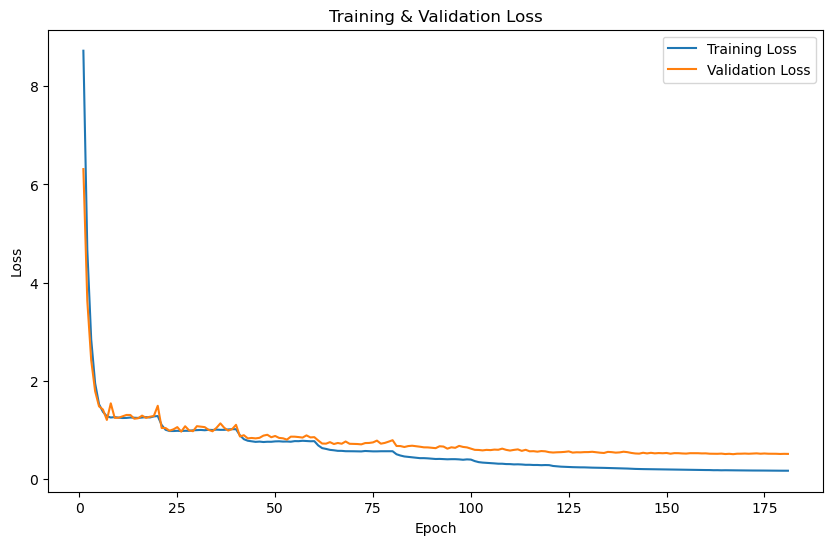

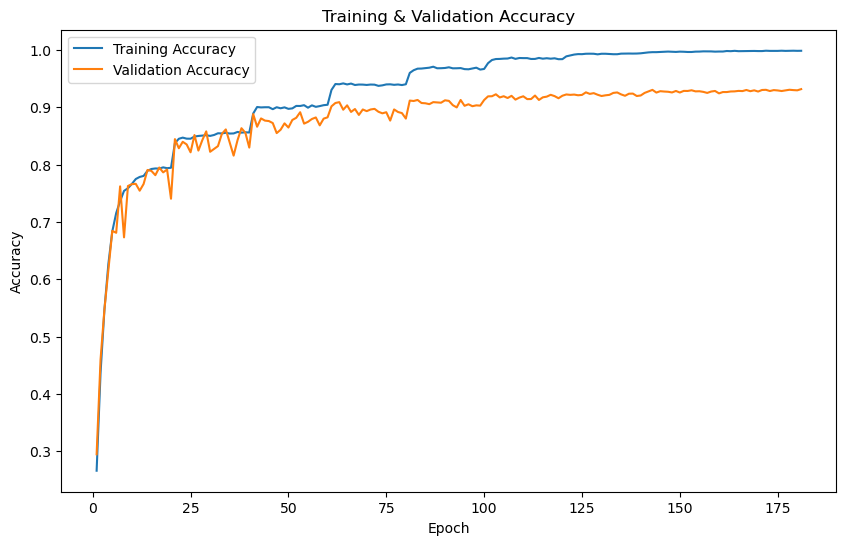

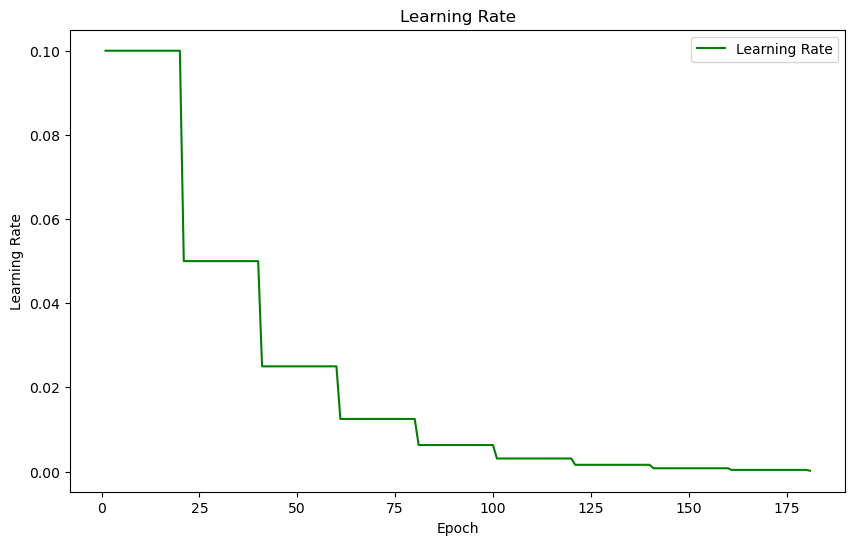

In [20]:
file_path = './training_logs.txt'
training_data_df = read_training_logs(file_path)
# Creating plots
plot_loss(training_data_df)
plot_accuracy(training_data_df)
plot_learning_rate(training_data_df)